# Big Data Computing

## Homework 3 - Dimensionality reduction

### Assignment 1

#### _Leonardo Di Nino, 1919479_

Let's import the needed libraries: we are going to use ```skimage``` to use the ```data.coins()``` module as a toy example, ```numpy``` for the needed linear algebra and ```matplotlib``` for visualization.

In [3]:
import skimage
import numpy as np
from matplotlib import pyplot as plt

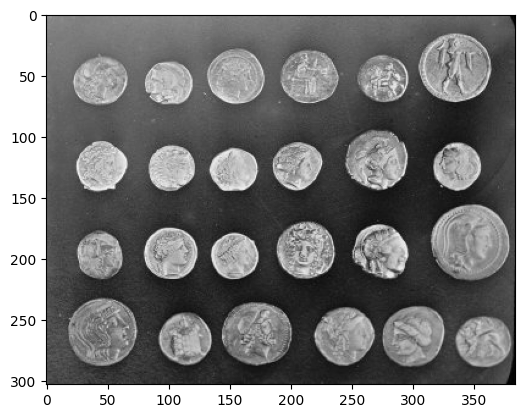

In [5]:
image = skimage.data.coins()
plt.imshow(image, cmap='gray')

Firstly let's compute a generic SVD for our image being a matrix. We leverage ```numpy.linalg.svd``` module setting the parameter ```full_matrices=False``` in order to retrieve matchable dimension for the three matrices $U, V$ and $\Sigma$. In fact this parameter enable the so called _compact SVD_ where the matrices  $U$ and $V$ are rectangular of size $m \times r$ and $n \times r$ respectively, and the matrix $\Sigma$ is squared diagonal of size $r \leq \min\{n,m\}$, being $n, m$ the dimension for the full matrices $U,V$: in this sense $U,V$ are semiunitary matrices.

In [3]:
U, sigma, V = np.linalg.svd(image, full_matrices=False)
sigma = np.diag(sigma)

In [4]:
print(U.shape)
print(sigma.shape)
print(V.shape)

(303, 303)
(303, 303)
(303, 384)


Please note that in this specific case, being $r = m$, $U$ turns out to be a square matrix, and that by default $V$ is given as $V^T$. 

Let's plot the black and white image.

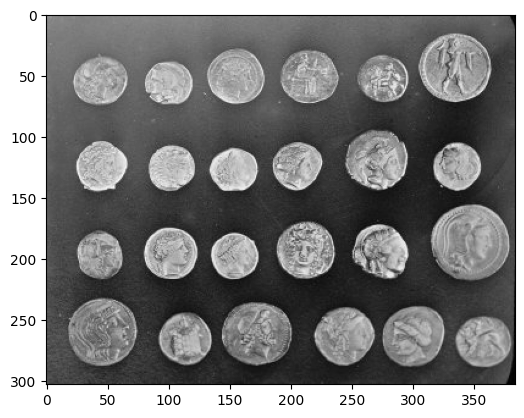

In [5]:
plt.imshow(U@sigma@V, cmap='gray')

Now let's design a function ```TruncatedSVD``` to compute the truncated SVD: this allows us to perform low-rank approximation. The algorithm is very easy:
+ Firstly we compute the SVD of an input ```matrix``` $M$;
+ Then we collapse to zero all the singular values after a certain index ```k``` retrieved as the one corresponding to a certain fraction to singular values (please notice that ```numpy.linalg.svd``` output the singular values in a sorted array);
+ We build the diagonal matrix $\hat{\Sigma}$ from the array of truncated singular values;
+ Finally we reconstruct the matrix as $\hat{M} = U\hat{\Sigma}V^T$

We also outputs some values that will be useful later: the Frobenius distance between the matrix and its reconstruction, the sum of the squared collapsed singular values and the percentage of Frobenius norm of the reconstruction. 

In [7]:
def TruncatedSVD(matrix, f = 0.5):
    U, sigma, V = np.linalg.svd(matrix, full_matrices=False)
    k = np.ceil(sigma.size*f).astype(int)
    S = np.sum(sigma[k:]**2)
    sigma[k:] = 0
    Sigma = np.diag(sigma)
    return U@Sigma@V, np.linalg.norm(matrix - U@Sigma@V, ord='fro')**2, S, np.linalg.norm(U@Sigma@V, ord='fro')/np.linalg.norm(matrix, ord='fro')

Let's plot the required visualization:

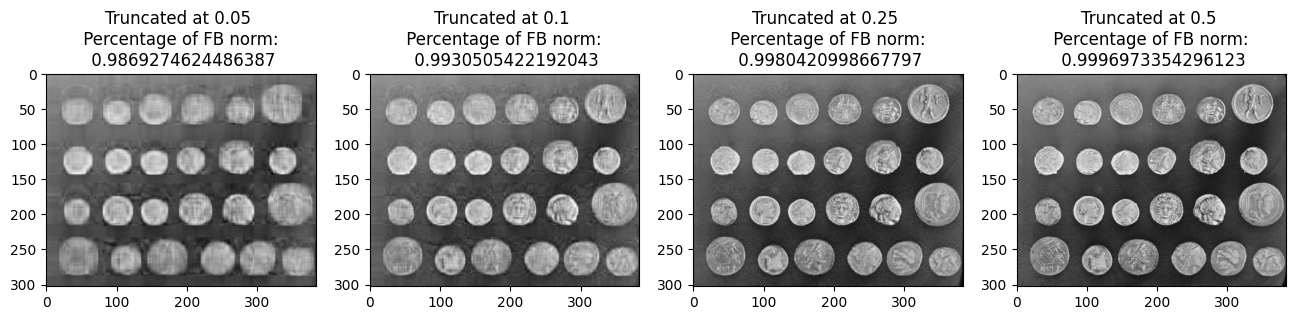

In [15]:
levels = [0.05, 0.1, 0.25, 0.5]

fig, axs = plt.subplots(1,4,figsize=(16, 25))
for j in range(0,4):
    M, _, _, P = TruncatedSVD(image, f = levels[j])
    axs[j].set_title(f'Truncated at {levels[j]} \n Percentage of FB norm: \n {P}')
    axs[j].imshow(M,cmap='gray')


Just for the seek of completeness let's have a look between the squared Froebenius norm $||M-\hat{M}||^2_{FB}$ and the sum of the squared collapsed singular values $\sum_{i=k+1}^n \hat{\sigma}_i^2$: we expect to see the same values if the procedure has been correctly implemented.

In [19]:
for j in range(0,4):
    _, D, S = TruncatedSVD(image, f = levels[j])
    print(f'The squared Froebenius distance between M and its {levels[j]}-truncated reconstruction is {D}')
    print(f'The sum of the squared collapsed singular values at such a truncation is {S} \n')

The squared Froebenius distance between M and its 0.05-truncated reconstruction is 36801503.62935238
The sum of the squared collapsed singular values at such a truncation is 36801503.62935235 

The squared Froebenius distance between M and its 0.1-truncated reconstruction is 19624241.780481998
The sum of the squared collapsed singular values at such a truncation is 19624241.780481987 

The squared Froebenius distance between M and its 0.25-truncated reconstruction is 5542667.464715726
The sum of the squared collapsed singular values at such a truncation is 5542667.464715726 

The squared Froebenius distance between M and its 0.5-truncated reconstruction is 857530.3637836664
The sum of the squared collapsed singular values at such a truncation is 857530.3637836662 



To complete the exercise, let's have a look to the same pipeline applied to different images that are collected from a dataset of brain tumors MRIs I used for a deep learning project:


In [35]:
import cv2
images = ["IMG1.jpg","IMG2.jpg","IMG3.jpg","IMG4.jpg"]

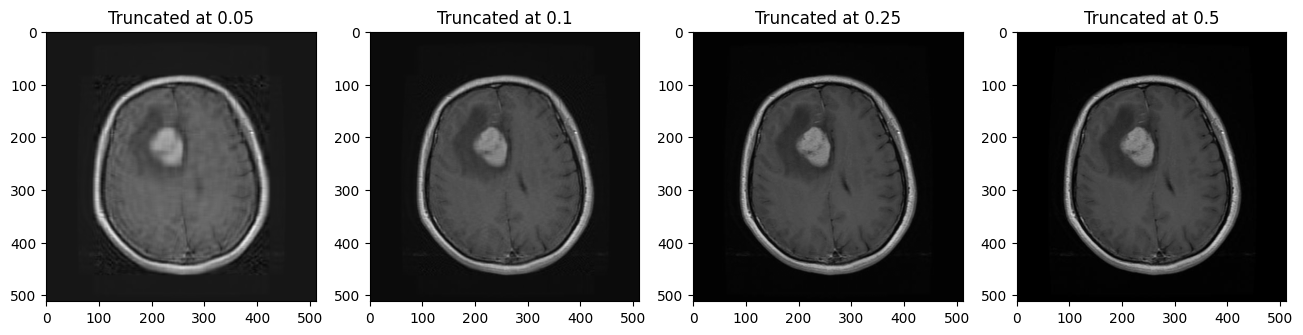

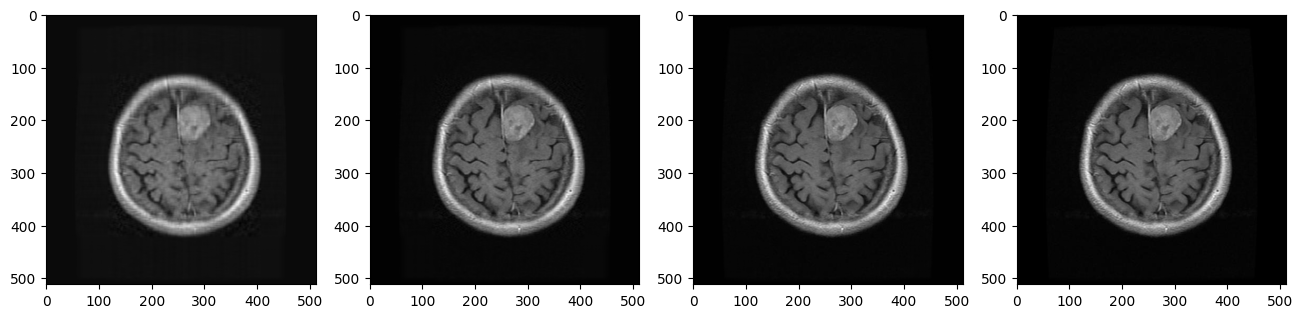

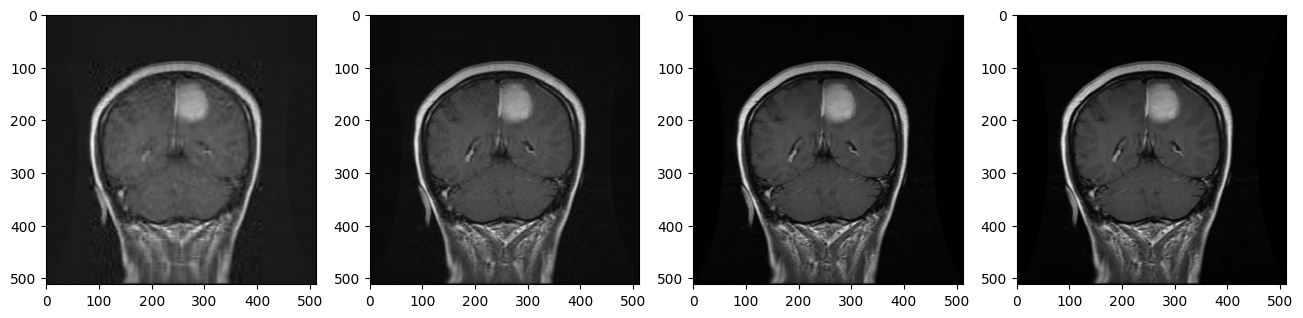

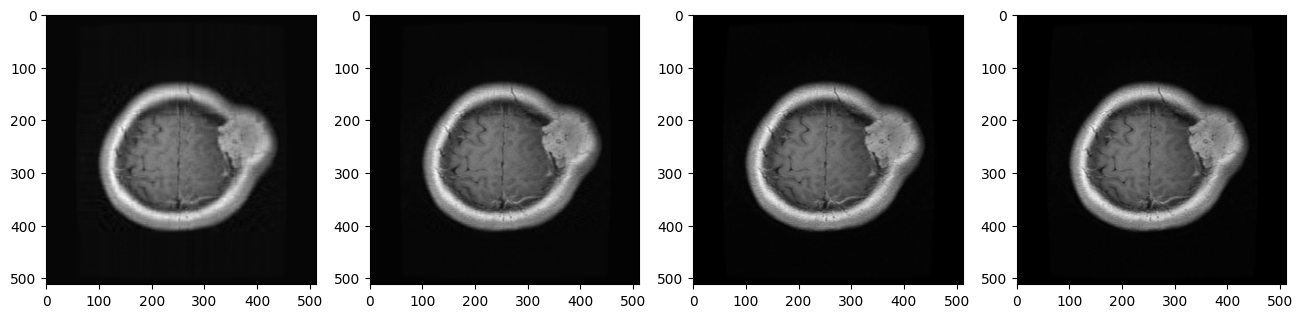

In [36]:
for i in range(0,4):
    fig, axs = plt.subplots(1,4,figsize=(16, 25))
    image = cv2.imread(images[i])
    for j in range(0,4):
        M, _, _, _ = TruncatedSVD(image[:,:,0], f = levels[j])
        axs[j].imshow(M,cmap='gray')
        if i == 0:
            axs[j].set_title(f'Truncated at {levels[j]}')
